<h1>statistical Analysis<h1>


<h2>1. Chi_squre test<h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
contigency_table = pd.crosstab(df['sex'],df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [4]:
# perform chi square test
stats.chi2_contingency(contigency_table)

Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [5]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


<h1>2. Normal distribution<h1>

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

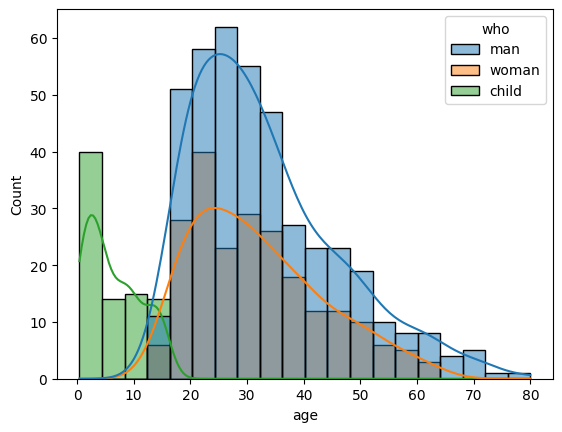

In [7]:
sns.histplot(data=df,x='age',hue='who',kde=True)

In [8]:
stats.shapiro(df['age'])

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [9]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['age'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: nan, Sample does not look Gaussian/Normally Distributed (reject H0)


In [10]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

In [11]:
statistic, p = stats.shapiro(df['fare'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0840444395829658e-43, Sample does not look Gaussian/Normally Distributed (reject H0)


<h1>t-test<h1>

In [12]:
import scipy.stats as stats

# sample data
x = [1, 2, 3, 4, 5]

# known population mean
mu = 4

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print results
print('t-statistic:', t_statistic)
print('p-value:', p)

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to population mean (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (reject H0)')

t-statistic: -1.414213562373095
p-value: 0.23019964108049873
p-value: 0.23019964108049873, Sample mean is equal to population mean (fail to reject H0)


<h2>Two sample t_test<h2>

In [13]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
t_stat, p = stats.ttest_ind(group1, group2, equal_var=True)

print("t-statistic:", t_stat)
print("p-value:", p)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')

t-statistic: 1.8482055087756457
p-value: 0.10175647371829195
p-value: 0.10175647371829195, group1 mean is equal to group2 mean (fail to reject H0)


<h1>Test for Homogenety<h1>

<h2>Levene test<h2>

In [14]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Levene's Test
w_stat, p_val = stats.levene(group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

# print the results based on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, Variances are equal (fail to reject H0)



2. Bartlett's Test

In [15]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Bartlett's Test
t_stat, p_val = stats.bartlett(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

t-statistic: 0.24050679805097827
p-value: 0.6238403179343277
p-value: 0.6238403179343277, Variances are equal (fail to reject H0)
